<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-28 12:10:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  57.6MB/s    in 3.4s    

2025-06-28 12:10:38 (58.6 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


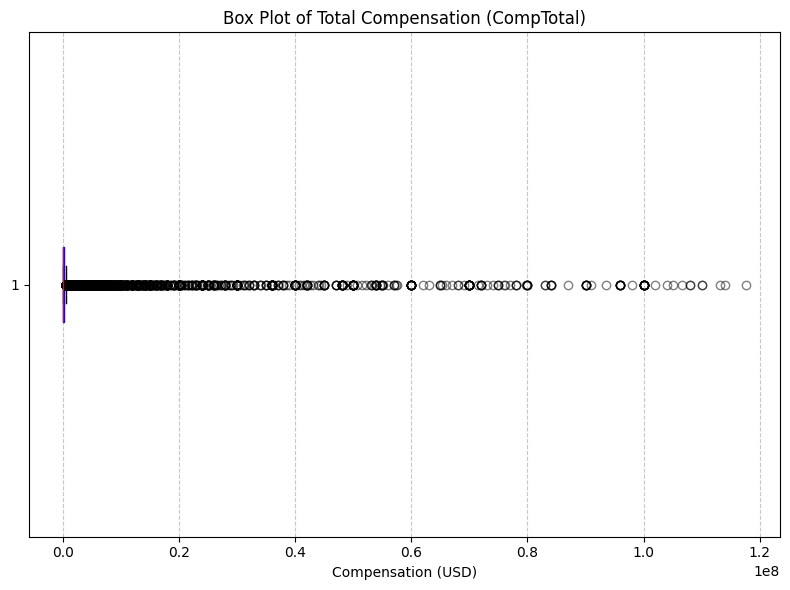

In [8]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to database and extract CompTotal
conn = sqlite3.connect("survey-data.sqlite")

query = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Step 2: Remove extreme outliers for better visualization (e.g., top 1%)
df = df[df["CompTotal"] < df["CompTotal"].quantile(0.99)]

# Step 3: Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df["CompTotal"], vert=False, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            whiskerprops=dict(color="black"),
            capprops=dict(color="black"),
            flierprops=dict(marker='o', color='black', alpha=0.5))

plt.title("Box Plot of Total Compensation (CompTotal)")
plt.xlabel("Compensation (USD)")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


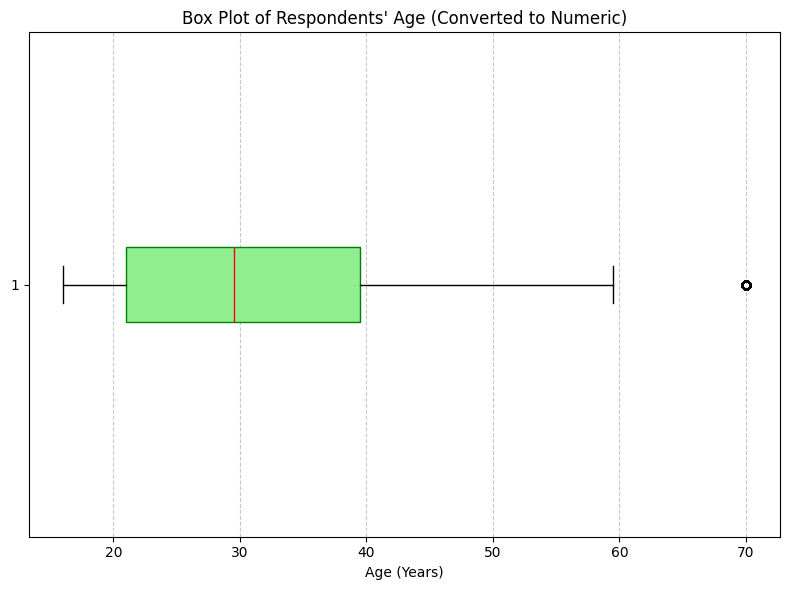

In [9]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect and read Age column
conn = sqlite3.connect("survey-data.sqlite")

query = "SELECT Age FROM main WHERE Age IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# Step 2: Map Age to numeric midpoints
age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70,
    "Prefer not to say": None
}
df["AgeNumeric"] = df["Age"].map(age_mapping)

# Drop rows with None after mapping
df = df[df["AgeNumeric"].notnull()]

# Step 3: Create box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df["AgeNumeric"], vert=False, patch_artist=True,
            boxprops=dict(facecolor="lightgreen", color="green"),
            medianprops=dict(color="red"),
            whiskerprops=dict(color="black"),
            capprops=dict(color="black"),
            flierprops=dict(marker='o', color='black', alpha=0.5))

plt.title("Box Plot of Respondents' Age (Converted to Numeric)")
plt.xlabel("Age (Years)")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 1000x600 with 0 Axes>

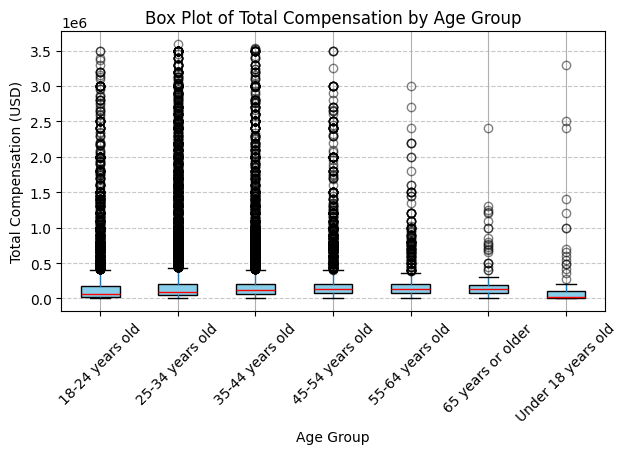

In [10]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to database and load relevant columns
conn = sqlite3.connect("survey-data.sqlite")

query = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL AND CompTotal > 0
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Step 2: Filter only meaningful age groups and limit extreme CompTotal outliers
valid_ages = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df = df[df['Age'].isin(valid_ages)]
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.95)]  # Remove top 5% as outliers

# Step 3: Plot box plot
plt.figure(figsize=(10, 6))
df.boxplot(column="CompTotal", by="Age", patch_artist=True,
           boxprops=dict(facecolor="skyblue"),
           medianprops=dict(color="red"),
           flierprops=dict(marker='o', color='gray', alpha=0.5))

plt.title("Box Plot of Total Compensation by Age Group")
plt.suptitle("")  # Suppress automatic suptitle from boxplot
plt.xlabel("Age Group")
plt.ylabel("Total Compensation (USD)")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 1000x600 with 0 Axes>

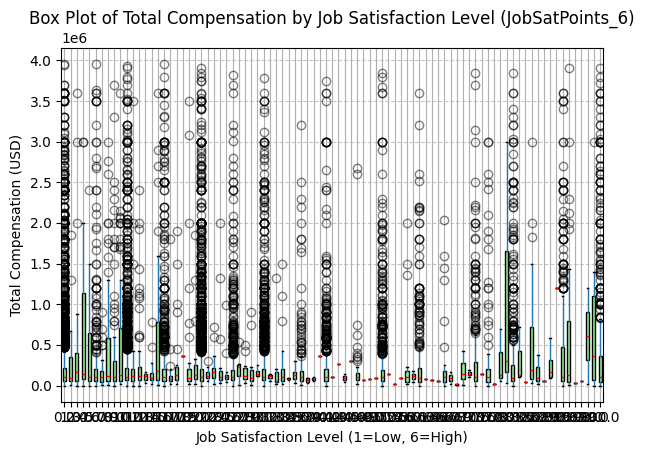

In [11]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Load required columns where values are not null or invalid
query = """
SELECT JobSatPoints_6, CompTotal
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL AND CompTotal > 0
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Step 3: Remove extreme compensation outliers for better visualization
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.95)]  # Remove top 5%

# Step 4: Plot box plot
plt.figure(figsize=(10, 6))
df.boxplot(column="CompTotal", by="JobSatPoints_6", patch_artist=True,
           boxprops=dict(facecolor="lightgreen"),
           medianprops=dict(color="red"),
           flierprops=dict(marker='o', color='gray', alpha=0.5))

plt.title("Box Plot of Total Compensation by Job Satisfaction Level (JobSatPoints_6)")
plt.suptitle("")  # Suppress default title
plt.xlabel("Job Satisfaction Level (1=Low, 6=High)")
plt.ylabel("Total Compensation (USD)")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1000x600 with 0 Axes>

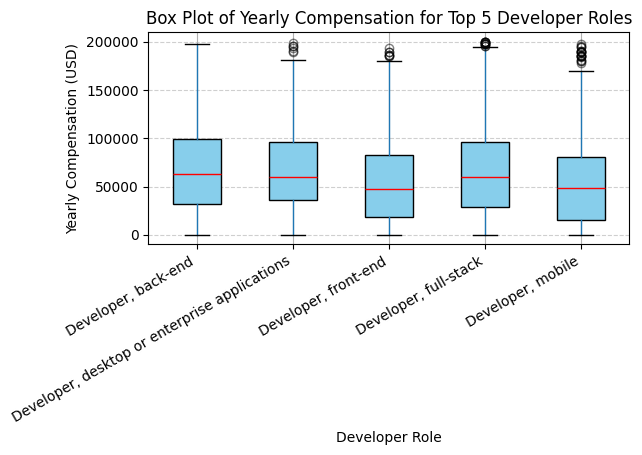

In [12]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to the database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Load only relevant columns where compensation and DevType are not null
query = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL AND ConvertedCompYearly > 0
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Step 3: Split multi-role entries (DevType has semicolon-separated values)
from collections import Counter

# Expand DevType into individual rows for each type
dev_rows = []
for _, row in df.iterrows():
    dev_types = str(row["DevType"]).split(";")
    for dev in dev_types:
        dev_rows.append({"DevType": dev.strip(), "ConvertedCompYearly": row["ConvertedCompYearly"]})

df_expanded = pd.DataFrame(dev_rows)

# Step 4: Get top 5 most frequent developer types
top_5_devtypes = df_expanded['DevType'].value_counts().nlargest(5).index.tolist()

# Step 5: Filter for top 5 roles and remove extreme compensation outliers
df_top = df_expanded[df_expanded["DevType"].isin(top_5_devtypes)]
df_top = df_top[df_top["ConvertedCompYearly"] < df_top["ConvertedCompYearly"].quantile(0.95)]  # Trim outliers

# Step 6: Create the box plot
plt.figure(figsize=(10, 6))
df_top.boxplot(column="ConvertedCompYearly", by="DevType", patch_artist=True,
               boxprops=dict(facecolor="skyblue"),
               medianprops=dict(color="red"),
               flierprops=dict(marker='o', color='gray', alpha=0.5))

plt.title("Box Plot of Yearly Compensation for Top 5 Developer Roles")
plt.suptitle("")  # Remove default title
plt.xlabel("Developer Role")
plt.ylabel("Yearly Compensation (USD)")
plt.xticks(rotation=30, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1000x600 with 0 Axes>

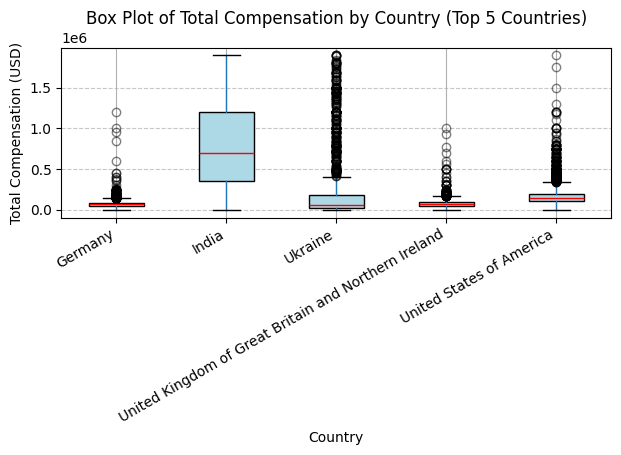

In [13]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Load relevant data
query = """
SELECT Country, CompTotal
FROM main
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL AND CompTotal > 0
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Step 3: Get the top 5 countries by number of respondents
top_5_countries = df['Country'].value_counts().nlargest(5).index.tolist()

# Step 4: Filter data to include only those top 5 countries
df_top = df[df['Country'].isin(top_5_countries)]

# Step 5: Remove outliers beyond the 95th percentile for better visualization
df_top = df_top[df_top['CompTotal'] < df_top['CompTotal'].quantile(0.95)]

# Step 6: Create the box plot
plt.figure(figsize=(10, 6))
df_top.boxplot(column='CompTotal', by='Country', patch_artist=True,
               boxprops=dict(facecolor='lightblue'),
               medianprops=dict(color='red'),
               flierprops=dict(marker='o', color='gray', alpha=0.5))

plt.title("Box Plot of Total Compensation by Country (Top 5 Countries)")
plt.suptitle("")  # Remove default matplotlib title
plt.xlabel("Country")
plt.ylabel("Total Compensation (USD)")
plt.xticks(rotation=30, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_761/3612894416.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

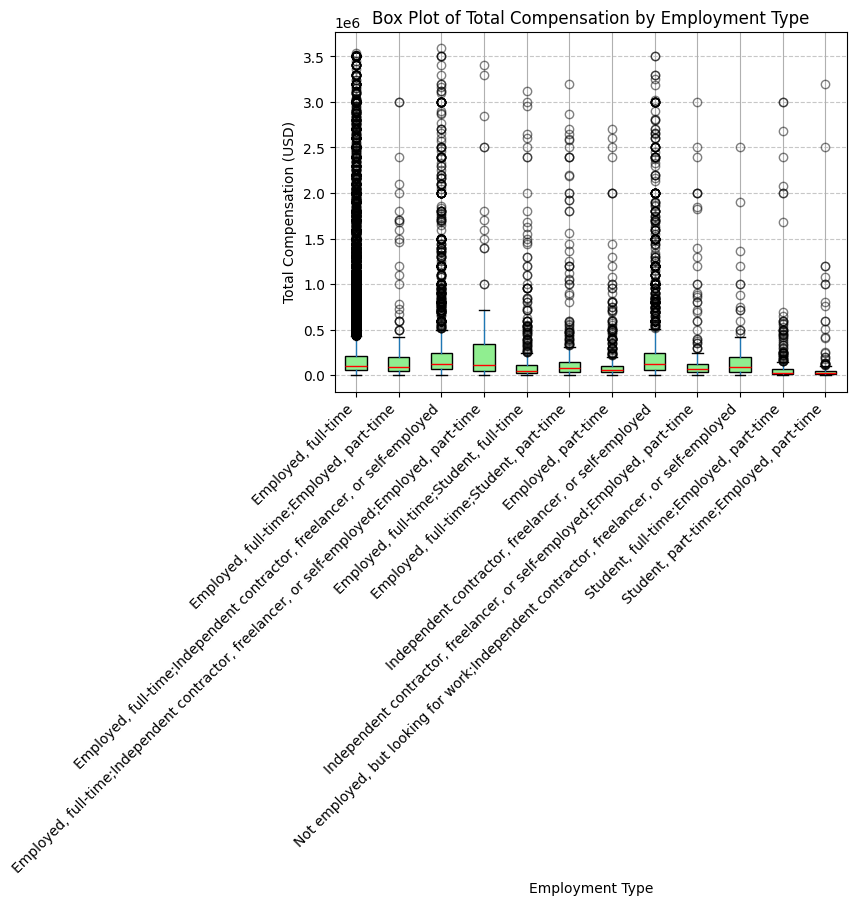

In [14]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query required data
query = """
SELECT Employment, CompTotal
FROM main
WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL AND CompTotal > 0
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Step 3: Filter Employment types with sufficient respondents (optional: at least 100)
top_employment = df['Employment'].value_counts()
valid_employment = top_employment[top_employment > 100].index.tolist()
df = df[df['Employment'].isin(valid_employment)]

# Step 4: Remove extreme outliers (above 95th percentile)
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.95)]

# Step 5: Plot the boxplot
plt.figure(figsize=(12, 6))
df.boxplot(column='CompTotal', by='Employment', patch_artist=True,
           boxprops=dict(facecolor='lightgreen'),
           medianprops=dict(color='red'),
           flierprops=dict(marker='o', color='gray', alpha=0.5))

plt.title("Box Plot of Total Compensation by Employment Type")
plt.suptitle("")  # Suppress matplotlib default title
plt.xlabel("Employment Type")
plt.ylabel("Total Compensation (USD)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [ ]:
# your code goes here

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
